In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Introduction :


In today's digital landscape, personalized recommendation systems are essential for improving user engagement across platforms. Our project focuses on creating an advanced recommendation system for a social media platform, tailoring content to users' preferences. By using data analytics and machine learning, we aim to deliver a seamless and personalized experience, tackling challenges like bias and privacy. With diverse datasets and rigorous evaluation, we have built robust models for accurate suggestions while respecting user privacy.

# Literature Review :


Recommendation systems are essential for enhancing online user engagement, adapting through advanced algorithms. Content-Based Filtering stand out as common approaches, with Hybrid Recommender Systems combining their respective strengths. Prioritizing fairness and addressing biases are pivotal considerations for effective recommendation systems. Striking a balance between personalized suggestions and ethical handling of user data is crucial. In summary, the evolution of recommendation systems is marked by a quest for personalized experiences, navigated through a landscape of algorithmic innovation and ethical considerations.

# Dataset :


The dataset has been taken from the Kaggle - Netflix movies data base.
More exploration done in the further analysis.

# Exploration of the dataset

In [4]:
ratings = pd.read_csv('/content/credits.csv.zip')
links_small = pd.read_csv('/content/links_small.csv')
credits = pd.read_csv('/content/credits.csv.zip')
keywords = pd.read_csv('/content/keywords.csv.zip')
metadata = pd.read_csv('/content/movies_metadata.csv.zip',low_memory=False)
ratings_small = pd.read_csv('/content/ratings_small.csv.zip')
links = pd.read_csv('/content/links.csv')


The below are the explanations about the datasets:

ratings.csv: This file keeps track of what ratings users gave to different items. So, if someone liked a movie or not, it's recorded here.

links_small.csv: This file contains links connecting the items in our main dataset to other sources outside of it. For example, it might show where you can find more information about a movie on another website.

credits.csv: Here, you'll find information about the people involved in making each item. For movies, this could include details about the actors, directors, and other crew members.

keywords.csv: This file lists keywords or tags associated with each item. These words give extra details about the items, which can help the recommendation system understand them better.

movies_metadata.csv: Think of this as a big information sheet about each item. It contains details like the title, genre, and release year of movies, as well as a summary of what they're about.

ratings_small.csv: This file is similar to the first ratings file, but it might be a smaller version, maybe used for testing or checking how well the recommendation system is working.

links.csv: Similar to links_small.csv, this file contains connections between items in our dataset and other sources.

In [5]:
print(ratings.shape)
ratings.head()

(45476, 3)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


The 'cast' column contains details about the cast involved in each movie, such as the character they played.

The 'crew' column includes information about the crew members associated with each movie, likely including directors, producers, and other production roles.

The 'id' column presumably serves as a unique identifier for each movie

In [6]:
print(links_small.shape)
links_small.head()

(9125, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


The 'movieId' column likely represents a unique identifier for each movie.

The 'imdbId' column contains the IMDb IDs associated with each movie, providing a reference to the movie on the IMDb website.

The 'tmdbId' column includes the TMDb IDs, which serve as identifiers for the movies on The Movie Database platform.

In [7]:
print(credits.shape)
credits.head()



(45476, 3)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


The 'cast' column likely contains details about the cast members for each movie, including information such as the characters they portray.

The 'crew' column presumably includes information about the crew members involved in each movie's production, such as directors, producers, and other key roles.

The 'id' column likely serves as a unique identifier for each movie.

In [8]:
print(keywords.shape)
keywords.head()


(46419, 2)


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


The 'id' column likely serves as a unique identifier for each movie.

The 'keywords' column contains a list of keywords or tags related to each movie. These keywords provide additional context or metadata about the content or theme of the movie.

In [9]:
credit_key = pd.merge(credits, keywords, on = 'id')
credit_key.head()

,cast,crew,id,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


The 'cast' column contains information about the cast members for each movie, specifying their roles or characters.

The 'crew' column includes details about the crew involved in the production of each movie, such as directors, producers, and other key personnel.

The 'id' column serves as a unique identifier for each movie.
The 'keywords' column provides additional context or metadata about each movie, offering insight into its themes, topics, or key elements.

In [10]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
metadata['imdb_id'] = metadata['imdb_id'].str.replace('tt0','')
metadata['imdb_id'] = metadata['imdb_id'].str.replace('tt','')

In [12]:
print(ratings_small.shape)


(100004, 4)


In [13]:
''' There have been three date values that have been stored in the id column ,
 so removing that and trying to replace the column as an int type '''

metadata = metadata[metadata['id']!= '1997-08-20']
metadata = metadata[metadata['id']!= '2012-09-29']
metadata = metadata[metadata['id']!= '2014-01-01']

metadata['id'] = metadata['id'].astype(int)
metadata.shape

(45463, 24)

In [17]:
#Merge the metadata and creditkey dataframes based on a common column
metadata_credit_key = pd.merge(metadata , credit_key , on = 'id')

# Working on relevant datasets

In [18]:
def check_dt(dataframe):
    print("SHAPE".center(70, "-"))
    print(dataframe.shape)
    print("TYPE".center(70, "-"))
    print(dataframe.dtypes)
    print("INFO".center(70, "-"))
    print(dataframe.info())
    print("NA".center(70, "-"))
    print(dataframe.isnull().sum())
    print("DESCRIBE".center(70, "-"))
    print(dataframe.describe().T)
    print("NUNIQUE".center(70, "-"))
    print(dataframe.nunique())
check_dt(metadata)

--------------------------------SHAPE---------------------------------
(45463, 24)
---------------------------------TYPE---------------------------------
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
---------------------------------INFO---

In [15]:
import pandas as pd

#Convert the 'id' column in movies_metadataand other dataframes to numeric to ensure consistency, as it may not be in integer format
metadata['id'] = pd.to_numeric(metadata['id'], errors='coerce')
ratings['id'] = pd.to_numeric(ratings['id'], errors='coerce')
credits['id'] = pd.to_numeric(credits['id'], errors='coerce')
keywords['id'] = pd.to_numeric(keywords['id'], errors='coerce')

#Merge the ratings dataframe with the movies_metadata dataframe to combine movie information with corresponding ratings
ratings_metadata = pd.merge(ratings, metadata, left_on='id', right_on='id', how='left')

#Merge the links_small dataframe with the movies_metadata dataframe to link movie information with corresponding external identifiers
links_small_metadata = pd.merge(links_small, metadata, left_on='tmdbId', right_on='id', how='left')

#Merge the credits dataframe with the keywords dataframe to combine movie credits information with associated keywords
credits_keywords = pd.merge(credits, keywords, on='id', how='left')

#Optionally merge the combined data withthe movies_metadata dataframe for additional insights
full_metadata = pd.merge(credits_keywords, metadata, on='id', how='left')

#Display the mergeddataframes for inspection:
print("Ratings & Metadata:", ratings_metadata.head())
print("Links & Metadata:", links_small_metadata.head())
print("Credits, Keywords & Metadata:", full_metadata.head())

Ratings & Metadata:                                                 cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  adult  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  False   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  False   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  False   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  False   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  False   

                               belongs_to_collection    budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1                                                NaN  65000000   
2  {'id': 119050, 'name'

In [16]:
full_metadata.dropna(inplace=True)

In [17]:
# Display the first fewr/ows of the DataFrame for inspection
print(full_metadata.head())


                                                  cast  \
9    [{'cast_id': 1, 'character': 'James Bond', 'cr...   
68   [{'cast_id': 1, 'character': 'Craig Jones', 'c...   
69   [{'cast_id': 1, 'character': 'Seth Gecko', 'cr...   
153  [{'cast_id': 22, 'character': 'Auggie Wren', '...   
178  [{'cast_id': 2, 'character': 'Kimberly Hart / ...   

                                                  crew     id  \
9    [{'credit_id': '52fe426ec3a36847f801e14b', 'de...    710   
68   [{'credit_id': '52fe43999251416c75016ad5', 'de...  10634   
69   [{'credit_id': '52fe4271c3a36847f801f22d', 'de...    755   
153  [{'credit_id': '52fe442ac3a36847f80861c1', 'de...   5894   
178  [{'credit_id': '52fe44d8c3a36847f80ad707', 'de...   9070   

                                              keywords  adult  \
9    [{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam...  False   
68   [{'id': 897, 'name': 'rap music'}, {'id': 970,...  False   
69   [{'id': 246, 'name': 'dancing'}, {'id': 380, '...  False   


In [18]:
full_metadata.head()

,cast,crew,id,keywords,adult,belongs_to_collection,budget,genres,homepage,imdb_id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710,"[{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam...",False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,113189,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,"[{'cast_id': 1, 'character': 'Craig Jones', 'c...","[{'credit_id': '52fe43999251416c75016ad5', 'de...",10634,"[{'id': 897, 'name': 'rap music'}, {'id': 970,...",False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,113118,...,1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,"[{'cast_id': 1, 'character': 'Seth Gecko', 'cr...","[{'credit_id': '52fe4271c3a36847f801f22d', 'de...",755,"[{'id': 246, 'name': 'dancing'}, {'id': 380, '...",False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,116367,...,1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,"[{'cast_id': 22, 'character': 'Auggie Wren', '...","[{'credit_id': '52fe442ac3a36847f80861c1', 'de...",5894,"[{'id': 919, 'name': 'smoking'}, {'id': 1901, ...",False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,112541,...,1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,"[{'cast_id': 2, 'character': 'Kimberly Hart / ...","[{'credit_id': '52fe44d8c3a36847f80ad707', 'de...",9070,"[{'id': 10988, 'name': 'based on tv series'}, ...",False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,113820,...,1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0


In [19]:
print(full_metadata.head())


                                                  cast  \
9    [{'cast_id': 1, 'character': 'James Bond', 'cr...   
68   [{'cast_id': 1, 'character': 'Craig Jones', 'c...   
69   [{'cast_id': 1, 'character': 'Seth Gecko', 'cr...   
153  [{'cast_id': 22, 'character': 'Auggie Wren', '...   
178  [{'cast_id': 2, 'character': 'Kimberly Hart / ...   

                                                  crew     id  \
9    [{'credit_id': '52fe426ec3a36847f801e14b', 'de...    710   
68   [{'credit_id': '52fe43999251416c75016ad5', 'de...  10634   
69   [{'credit_id': '52fe4271c3a36847f801f22d', 'de...    755   
153  [{'credit_id': '52fe442ac3a36847f80861c1', 'de...   5894   
178  [{'credit_id': '52fe44d8c3a36847f80ad707', 'de...   9070   

                                              keywords  adult  \
9    [{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam...  False   
68   [{'id': 897, 'name': 'rap music'}, {'id': 970,...  False   
69   [{'id': 246, 'name': 'dancing'}, {'id': 380, '...  False   


In [20]:
print(full_metadata.isnull().sum())


cast                     0
crew                     0
id                       0
keywords                 0
adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64


In [25]:
print(full_metadata.nunique())


cast                     685
crew                     692
id                       692
keywords                 641
adult                      1
belongs_to_collection    423
budget                   164
genres                   333
homepage                 655
imdb_id                  692
original_language         21
original_title           688
overview                 691
popularity               693
poster_path              692
production_companies     555
production_countries     107
release_date             646
revenue                  502
runtime                  110
spoken_languages         152
status                     1
tagline                  685
title                    687
video                      2
vote_average              58
vote_count               555
dtype: int64


                  id       revenue     runtime  vote_average    vote_count
count     704.000000  7.040000e+02  704.000000    704.000000    704.000000
mean    75609.437500  2.329279e+08  107.160511      6.250568   1671.634943
std    101432.778786  3.281181e+08   27.080799      1.058999   2204.700543
min        11.000000  0.000000e+00    0.000000      0.000000      0.000000
25%      8435.500000  0.000000e+00   91.000000      5.800000    121.750000
50%     33260.000000  8.307102e+07  102.000000      6.300000    673.500000
75%     94341.750000  3.563635e+08  121.000000      7.000000   2440.250000
max    426580.000000  2.787965e+09  476.000000      8.500000  12269.000000


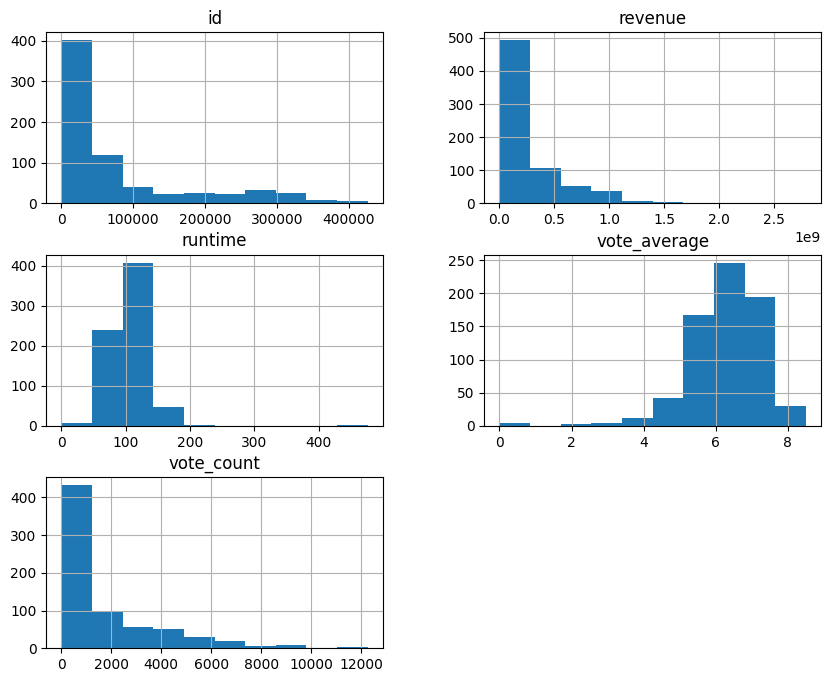

In [21]:
import matplotlib.pyplot as plt

# Generate summarystatistics for the DataFrame
print(full_metadata.describe())

# Create histograms for numericalcolumns to visualize their distributions
full_metadata.hist(figsize=(10, 8))
plt.show()


The above histograms gives the analysis for the numeric variables data present in the merged final datset

In [22]:
#Calculate the count of unique valuesin each categorical column
for col in full_metadata.select_dtypes(include='object').columns:
  print(full_metadata[col].value_counts())


cast
[{'cast_id': 1, 'character': 'Ash Ketchum', 'credit_id': '52fe43de9251416c750213f1', 'gender': 1, 'id': 67830, 'name': 'Veronica Taylor', 'order': 0, 'profile_path': '/28EFUb3bPWJaWYzZIxurGCrDpHk.jpg'}, {'cast_id': 3, 'character': 'Misty / Jessie / Wigglytuff', 'credit_id': '52fe43de9251416c750213f5', 'gender': 1, 'id': 67832, 'name': 'Rachael Lillis', 'order': 2, 'profile_path': None}, {'cast_id': 4, 'character': 'Brock / James / Squirtle', 'credit_id': '52fe43de9251416c750213f9', 'gender': 2, 'id': 67833, 'name': 'Eric Stuart', 'order': 3, 'profile_path': '/3aTpgbntEzsaPCfVFY5ZddZxqBR.jpg'}]                                                                                                                                                                                                                                                                                                                                                                                                           

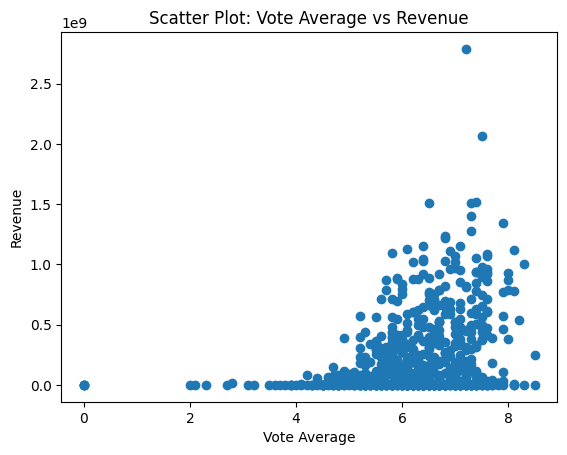

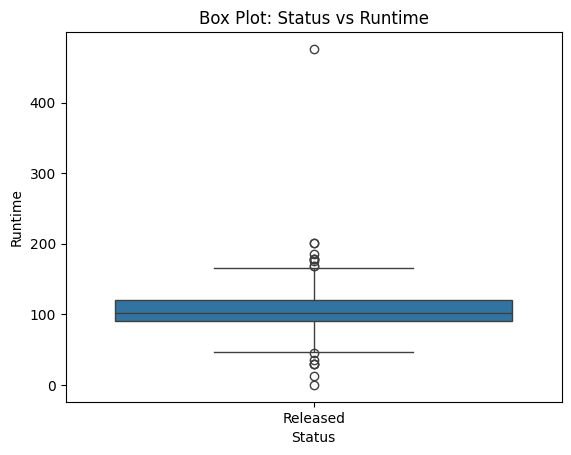

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a scatter plot between twonumerical columns
plt.scatter(full_metadata['vote_average'], full_metadata['revenue'])
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.title('Scatter Plot: Vote Average vs Revenue')
plt.show()

#Generate a box plotshowing the distribution of numerical values across categories
sns.boxplot(x='status', y='runtime', data=full_metadata)
plt.xlabel('Status')
plt.ylabel('Runtime')
plt.title('Box Plot: Status vs Runtime')
plt.show()


The above box plot tells us that the run time for the released movies mostly ranges from 90 min to 140 min

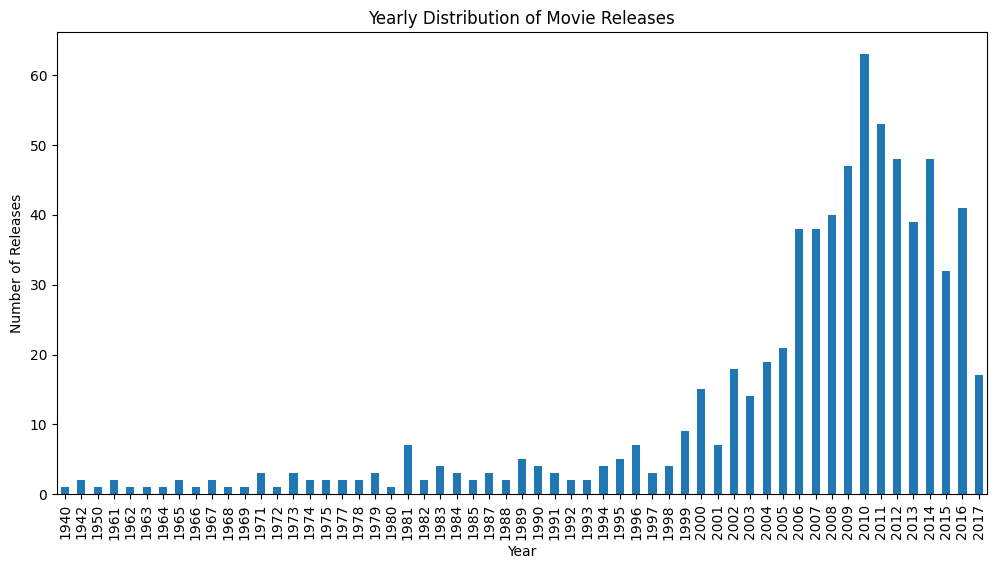

In [29]:
# Convert release_date to datetime format
full_metadata['release_date'] = pd.to_datetime(full_metadata['release_date'], errors='coerce')

# Extract year from release_date
full_metadata['release_year'] = full_metadata['release_date'].dt.year

# Plot yearly distribution of releases
plt.figure(figsize=(12, 6))
full_metadata['release_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Yearly Distribution of Movie Releases')
plt.show()


The above graph tells us that the movies data comprises of the released years from 1940 to 2009.

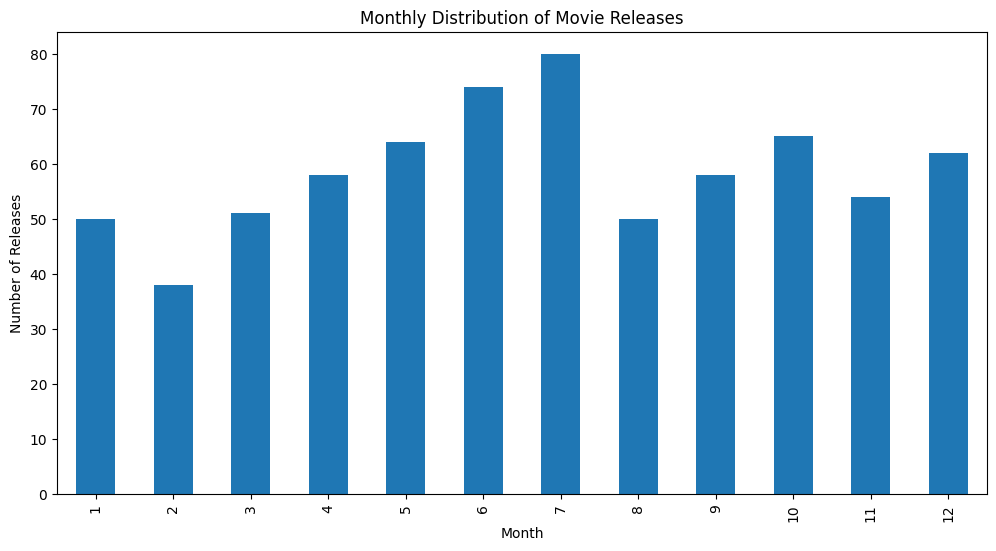

In [30]:
#Extract month from release_date
full_metadata['release_month'] = full_metadata['release_date'].dt.month

#Plot monthly distribution of releases
plt.figure(figsize=(12, 6))
full_metadata['release_month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Monthly Distribution of Movie Releases')
plt.show()


The above graph gives the information that movies released in July were given most of the reviews

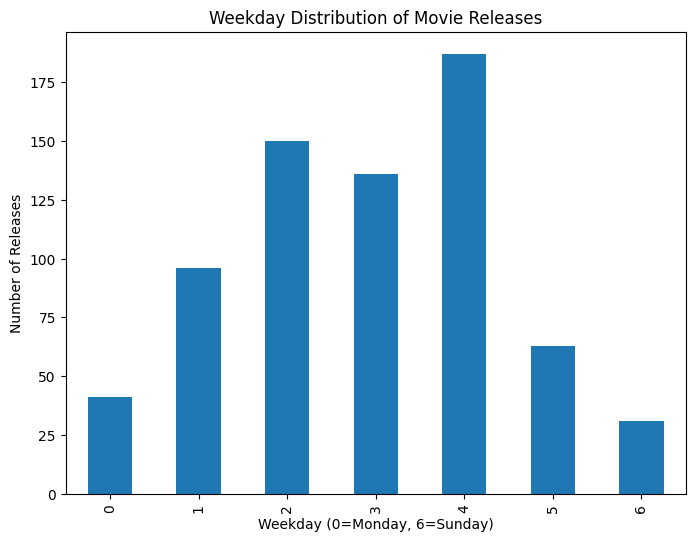

In [31]:
#Extract weekday from release_date
full_metadata['release_weekday'] = full_metadata['release_date'].dt.dayofweek

#Plot weekday distributionof releases
plt.figure(figsize=(8, 6))
full_metadata['release_weekday'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Number of Releases')
plt.title('Weekday Distribution of Movie Releases')
plt.show()


The above graph shows us that the weekend doesnot depend on the number of reviews of the moviews released, since there is no such pattern for the number of reviews given for the movies across the week.

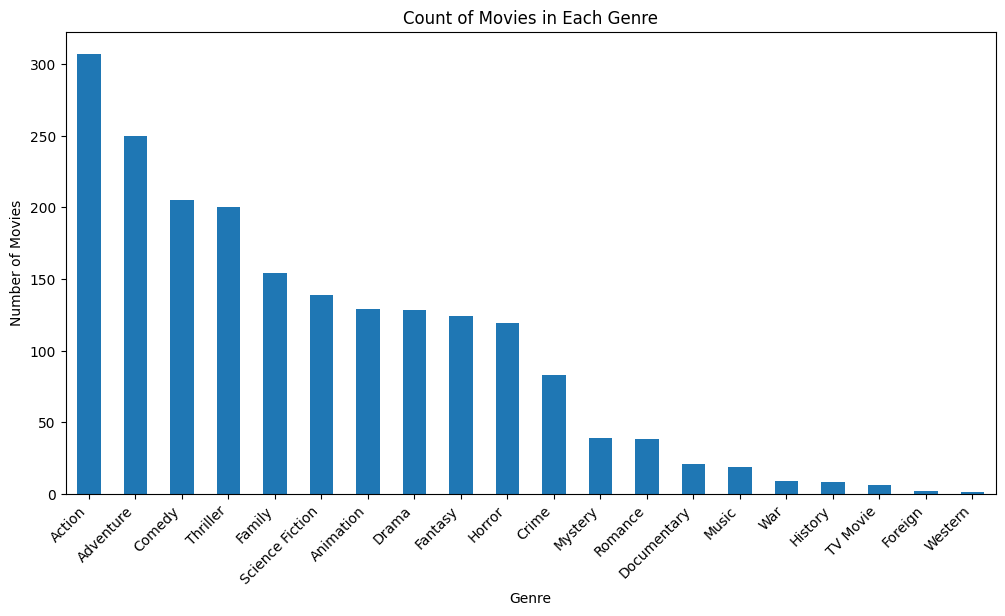

In [32]:
#Flatten the list of dictionaries in the 'genres' column
genres_list = full_metadata['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])

#Flatten the list of genres and count occurrences
all_genres = [genre for sublist in genres_list for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

#Plot the count of movies in each genre
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Count of Movies in Each Genre')
plt.xticks(rotation=45, ha='right')
plt.show()




The above graph shows us that the number of movies released were mostly in action genre followed by adventure, comedy and thriller.

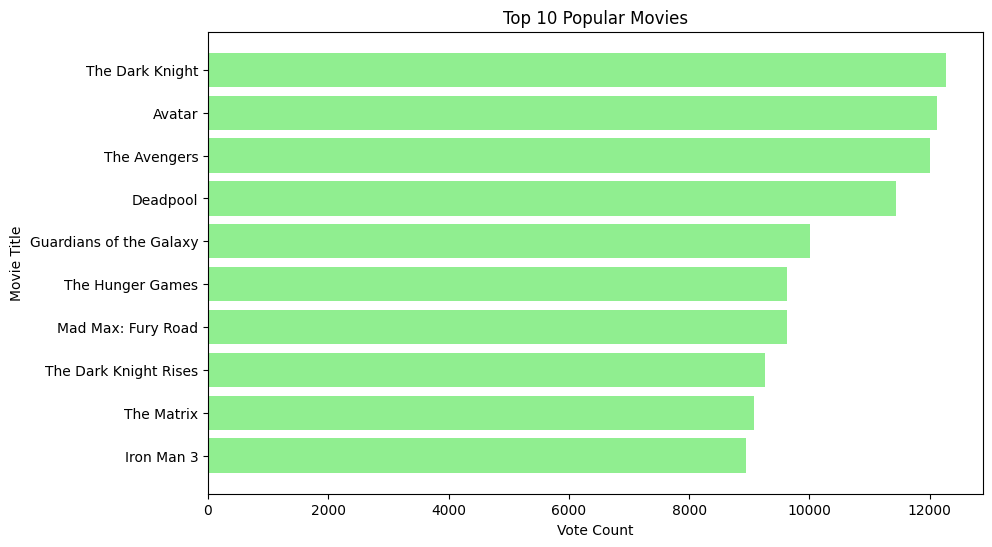

In [33]:
#Sort movies by vote count in descending order
popular_movies = full_metadata[['title', 'vote_count']].sort_values(by='vote_count', ascending=False).head(10)

#Plot bar chart of popular movies
plt.figure(figsize=(10, 6))
plt.barh(popular_movies['title'], popular_movies['vote_count'], color='lightgreen')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.title('Top 10 Popular Movies')
plt.gca().invert_yaxis()
plt.show()


The above graph shows the top 10 movies according to the count of reviews.

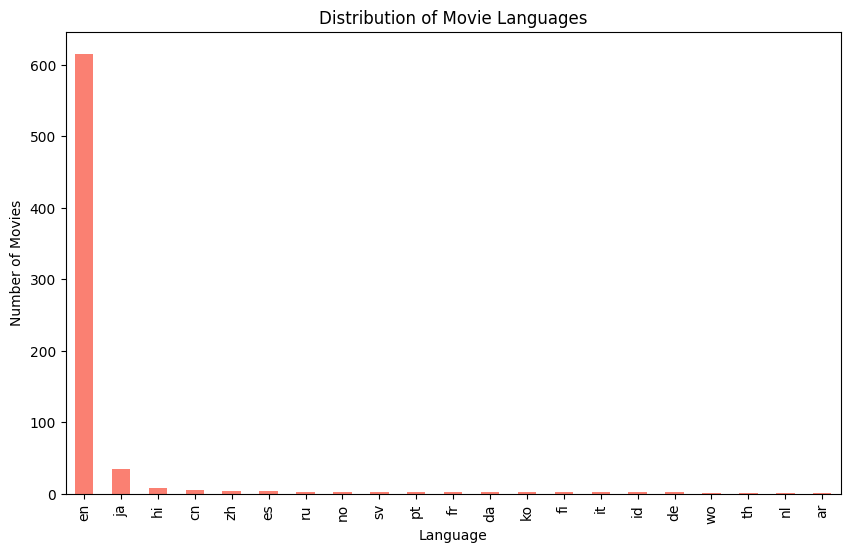

In [34]:
#Count of movies by language
language_counts = full_metadata['original_language'].value_counts()

#Plot bar chart of movie languages
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='salmon')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Languages')
plt.show()


The above graph tells us that movies releases were majorly in English language.

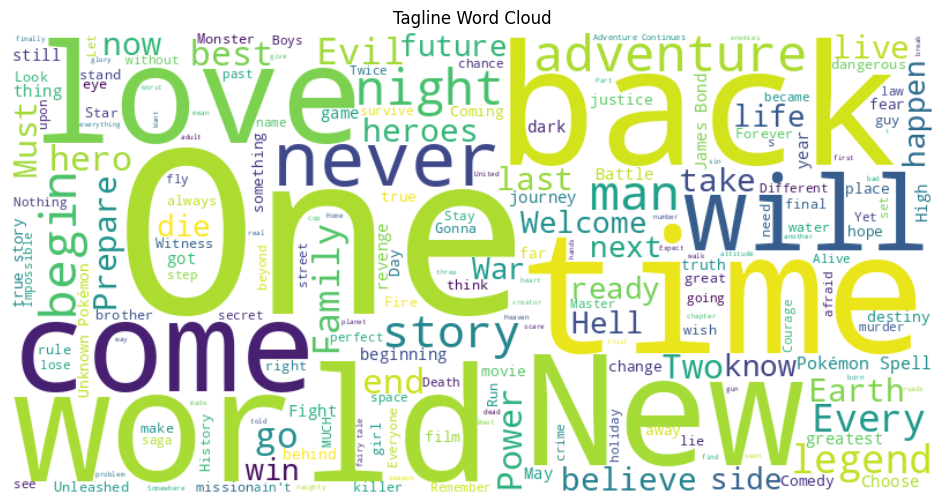

In [35]:
from wordcloud import WordCloud

#Concatenate all taglines into a single string
taglines = ' '.join(full_metadata['tagline'].dropna())

#Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(taglines)

#Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tagline Word Cloud')
plt.show()


The above picture helps us to say that mostly the movies were about time, love, world, future, family etc.

Note: The continuation modelling is in next jupyter notebook